In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')
raw_data = pd.read_csv('raw_data.csv',)
demographic = raw_data[['Sex','Age','AI','Experience']]
raw_data.describe()



,Sex,Age,AI,Experience,我会为了购买他/她喜欢的东西，不惜花费超出我经济承受范围的钱。,我为了和他/她约会，不惜花费超出我经济承受范围的钱。,我会为了陪伴他/她，而经常推掉推迟或取消自己的其他计划。,分手后，我依然会找各种机会与他/她进行沟通和交流情感问题。,我会在他/她的工作学习中提出自己的解决方案，即使他/她表示不需要建议。,我会在他/她，本题请选择非常认同。,...,无论什么事在我身上发生，我都能够应付自如。,有麻烦的时候，我通常能想到一些应付的方法。,我害怕其他人比我有更多精彩的经历、收获。,我害怕我的朋友比我有更多精彩的经历、收获。,当我发现我的朋友玩得很开心的时候没有我，我会感到烦恼。,当我不知道我的朋友在忙什么时，我会感到焦虑。,当我错过了和朋友见面的机会时，我会感到烦恼。,当我玩得开心时，在线与大家分享发生的事对我来说很重要(比如，更新状态)。,当我错过一个已经计划好的聚会时，我会感到烦恼。,当我外出旅行时，我仍密切关注朋友的最新动向。
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.0,...,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,1.616667,20.608333,0.075000,0.900000,3.325000,3.108333,4.075000,2.275000,3.366667,7.0,...,3.125000,3.891667,2.583333,2.266667,2.791667,2.491667,3.333333,3.066667,3.508333,2.625000
std,0.488237,3.313572,0.264496,0.834145,1.811089,1.738326,1.759309,1.680149,1.786661,0.0,...,1.104327,0.848091,1.274068,1.207354,1.187440,1.216109,1.252449,1.388629,1.250182,1.270628
min,1.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,20.000000,0.000000,0.000000,2.000000,2.000000,3.000000,1.000000,2.000000,7.0,...,2.000000,4.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,1.000000
50%,2.000000,20.000000,0.000000,1.000000,3.000000,3.000000,4.000000,2.000000,3.000000,7.0,...,3.000000,4.000000,3.000000,2.000000,3.000000,2.000000,4.000000,3.000000,4.000000,3.000000
75%,2.000000,21.000000,0.000000,2.000000,5.000000,4.000000,5.000000,3.000000,5.000000,7.0,...,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,2.000000,47.000000,1.000000,2.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
overinvolvement_retrieve = ["分手后，我尝试通过各种方式与他/她保持日常的联系，即使他/她已经明确表示希望保持距离。",
		"分手后，我会经常在社交媒体通过各种方式表达对他/她的依恋。",
		"分手后，我依然会找各种机会与他/她进行沟通和交流情感问题。",
		"分手后，我会尝试购买他/她喜欢但超出我经济能力的礼物来挽回这段感情。",
		"分手后，我会为了试图挽回他/她，通过共同的朋友或社交圈对他/她施加影响。"]
overinvolvement_sacrify = ["我会为了购买他/她喜欢的东西，不惜花费超出我经济承受范围的钱。",
		"我为了和他/她约会，不惜花费超出我经济承受范围的钱。",
		"我会为了陪伴他/她，而经常推掉推迟或取消自己的其他计划。",
		"我会为了有时间陪伴他/她，而压缩自己十分重视的爱好和兴趣的时间。"]
overinvolvement_interfer = ["我会在他/她的工作学习中提出自己的解决方案，即使他/她表示不需要建议。",
		"我会在他/她遇到小问题时立刻介入，即使这些问题他/她可以轻松解决。",
		"我会在他/她处理与朋友或家人的关系时插手，试图用自己的方式解决问题。",
		"我会在他/她进行个人财务管理时提供帮助，即使他/她表示不需要帮助。"]
# GSES = ["如果我尽力去做的话，我总是能够解决问题的。",
# 		"即使别人反对我，我仍有办法取得我所要的。",
# 		"对我来说，坚持理想和达成目标是轻而易举的。",
# 		"我自信能有效地应付任何突如其来的事情。",
# 		"以我的才智，我定能应付意料之外的情况。",
# 		"如果我付出必要的努力，我一定能解决大多数的难题。",
# 		"我能冷静地面对困难，因为我可信赖自己处理问题的能力。",
# 		"面对一个难题时，我通常能找到几个解决方法。",
# 		"有麻烦的时候，我通常能想到一些应付的方法。",
# 		"无论什么事在我身上发生，我都能够应付自如。"]
# RSES_positive = ["我认为自己是个有价值的人，至少与别人不相上下。",
# 		"我觉得我有许多优点。",
# 		"我做事可以做得和大多数人一样好。",
# 		"我对自己持有一种肯定的态度。",
# 		"整体而言，我对自己感到满意。"]
# RSES_negative = ["总的来说，我倾向于认为自己是一个失败者。",
# 		"我觉得自己没有什么值得自豪的地方。",
# 		"我要是能看得起自己就好了。",
# 		"有时我的确感到自己很没用。",
# 		"我有时认为自己一无是处。"]
# FoMOs_information = ["我害怕其他人比我有更多精彩的经历、收获。",
# 		"我害怕我的朋友比我有更多精彩的经历、收获。",
# 		"当我发现我的朋友玩得很开心的时候没有我，我会感到烦恼。",
# 		"当我不知道我的朋友在忙什么时，我会感到焦虑。"]
# FoMOs_episode = ["当我错过了和朋友见面的机会时，我会感到烦恼。",
# 		"当我玩得开心时，在线与大家分享发生的事对我来说很重要(比如，更新状态)。",
# 		"当我错过一个已经计划好的聚会时，我会感到烦恼。",
# 		"当我外出旅行时，我仍密切关注朋友的最新动向。"]
# SoAS_positive = ["我完全掌控我的行为。",
# 		"决定是否采取行动以及何时采取行动都在我的掌控之中。",
# 		"我做的事情是出于我的自由意愿。",
# 		"我的行为从开始到结束都是由我计划的。",
# 		"我对由我的行为造成的一切后果负有完全的责任。"]
# SoAS_negative = ["我只是别人手中的一个工具。",
# 		"我行为的结果往往会出乎我的意料。",
# 		"我所做的行为没有一个是自愿的。",
# 		"当我在行动的时候，我感觉自己是一个遥控机器人。"]

# scores = pd.DataFrame()
# scores['overinvolvement_retrieve'] = raw_data[overinvolvement_retrieve].sum(axis=1) / len(overinvolvement_retrieve)
# scores['overinvolvement_sacrify'] = raw_data[overinvolvement_sacrify].sum(axis=1) / len(overinvolvement_sacrify)
# scores['overinvolvement_interfer'] = raw_data[overinvolvement_interfer].sum(axis=1) / len(overinvolvement_interfer)
# scores['overinvolvement'] = (raw_data[overinvolvement_retrieve + overinvolvement_sacrify + overinvolvement_interfer].sum(axis=1)) / (len(overinvolvement_retrieve) + len(overinvolvement_sacrify) + len(overinvolvement_interfer))
# scores['GSES'] = raw_data[GSES].sum(axis=1) / len(GSES)
# scores['RSES_positive'] = raw_data[RSES_positive].sum(axis=1) / len(RSES_positive)
# scores['RSES_negative'] = ((4+1)*len(RSES_negative) - raw_data[RSES_negative].sum(axis=1)) / len(RSES_negative)
# scores['RSES'] = (raw_data[RSES_positive].sum(axis=1) + (4+1)*len(RSES_negative) - raw_data[RSES_negative].sum(axis=1)) / (len(RSES_positive) + len(RSES_negative))
# scores['FoMOs_information'] = raw_data[FoMOs_information].sum(axis=1) / len(FoMOs_information)
# scores['FoMOs_episode'] = raw_data[FoMOs_episode].sum(axis=1) / len(FoMOs_episode)
# scores['FoMOs'] = (raw_data[FoMOs_information + FoMOs_episode].sum(axis=1)) / (len(FoMOs_information) + len(FoMOs_episode))
# # scores['SoAS_positive'] = raw_data[SoAS_positive].sum(axis=1) / len(SoAS_positive)
# # scores['SoAS_negative'] = ((7+1)*len(SoAS_negative)-raw_data[SoAS_negative].sum(axis=1)) / len(SoAS_negative)
# # scores['SoAS'] = (raw_data[SoAS_positive].sum(axis=1) + (7+1)*len(SoAS_negative) - raw_data[SoAS_negative].sum(axis=1)) / (len(SoAS_positive) + len(SoAS_negative))
# scores.head(3)


,overinvolvement_retrieve,overinvolvement_sacrify,overinvolvement_interfer,overinvolvement,GSES,FoMOs_information,FoMOs_episode,FoMOs
0,1.2,1.00,1.25,1.153846,2.4,4.00,3.25,3.625
1,1.8,2.75,2.50,2.307692,3.2,3.25,3.75,3.500
2,3.6,1.75,3.25,2.923077,4.9,1.00,1.75,1.375


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
data_in_our_scale_scaled = pd.read_csv('data_in_our_scale_scaled.csv')
profiles = data_in_our_scale_scaled[['File_1','File_2','File_3','File']]
# data_with_total_score = pd.concat([raw_data, scores, profiles], axis=1)
# data_with_total_score.to_csv('data_with_total_score.csv', index=False)

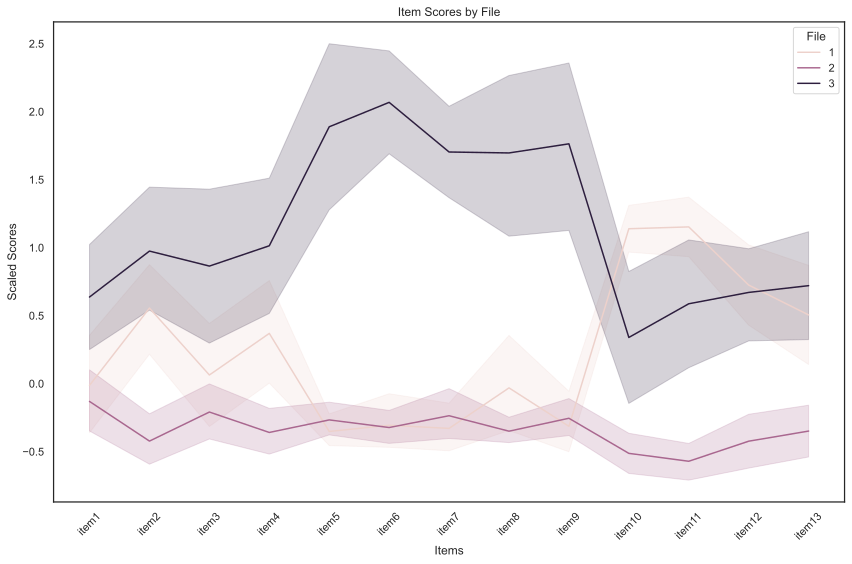

In [13]:
# 设置图形大小
plt.figure(figsize=(12, 8))

sns.set_theme(style='white')
# 使用 seaborn 绘制折线图
sns.lineplot(data=data_in_our_scale_scaled.melt(id_vars=['File'], value_vars=['item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8', 'item9', 'item10', 'item11', 'item12', 'item13']),
             x='variable', y='value', hue='File')

# 添加标题和标签
plt.title('Item Scores by File')
plt.xlabel('Items')
plt.ylabel('Scaled Scores')
plt.xticks(rotation=45)  # 旋转 x 轴标签以便更好地显示

# 显示图形
plt.tight_layout()
plt.show()



/var/folders/69/0fg_q2gs0yj7b4jhvs94m1940000gn/T/ipykernel_99659/2463111227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_by_ai['index'] = range(len(data_by_ai))


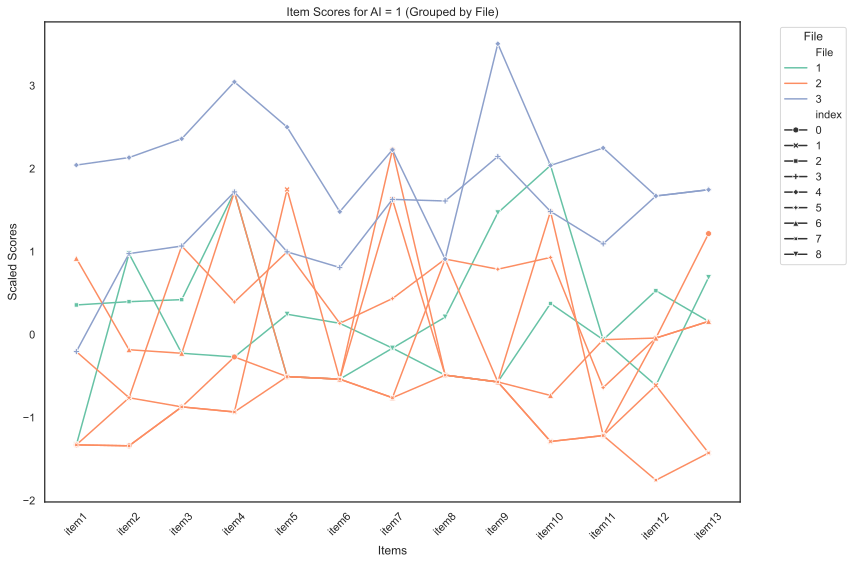

In [14]:
data_by_ai = data_in_our_scale_scaled[data_in_our_scale_scaled['AI'] == 1]
data_by_ai['index'] = range(len(data_by_ai))

# 设置图形大小
plt.figure(figsize=(12, 8))

# 设置主题
sns.set_theme(style='white')

# 将数据从宽格式转换为长格式
melted_data = data_by_ai.melt(
    id_vars=['index', 'File'],  # 保留 index 和 File 列
    value_vars=['item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8', 'item9', 'item10', 'item11', 'item12', 'item13']
)

# 使用 seaborn 绘制折线图
sns.lineplot(
    data=melted_data,
    x='variable', 
    y='value', 
    hue='File',  # 按 File 分组，设置颜色
    style='index',  # 按 index 分组，设置样式
    palette='Set2',  # 设置颜色主题
    markers=True,     # 添加标记点
    dashes=False      # 不使用虚线
)

# 添加标题和标签
plt.title('Item Scores for AI = 1 (Grouped by File)')
plt.xlabel('Items')
plt.ylabel('Scaled Scores')
plt.xticks(rotation=45)  # 旋转 x 轴标签以便更好地显示

# 显示图例
plt.legend(title='File', bbox_to_anchor=(1.05, 1), loc='upper left')

# 显示图形
plt.tight_layout()
plt.show()

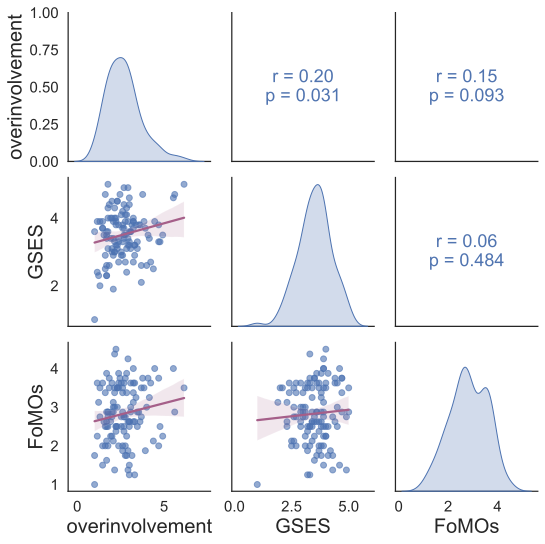

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# 假设 data_with_total_score 是你的 DataFrame
# 确保 DataFrame 中包含 'overinvolvement', 'GSES', 'FoMOs_information', 'FoMOs_episode', 'FoMOs' 列

# 定义 scales 列
# scales = ['overinvolvement', 'GSES','FoMOs_information', 'FoMOs_episode', 'FoMOs']
scales = ['overinvolvement', 'GSES','FoMOs']

# 创建 PairGrid
g = sns.PairGrid(data_with_total_score[scales])

# 在下三角绘制散点图并添加趋势线和置信区间
g.map_lower(sns.regplot, scatter_kws={'alpha': 0.6}, line_kws={'color': '#A55F89'})

# 在对角线绘制核密度估计图
g.map_diag(sns.kdeplot, fill=True)

# 在上三角标注相关系数和显著性水平
def corr_func(x, y, **kws):
    r, p = pearsonr(x, y)  # 计算 Pearson 相关系数和 p 值
    ax = plt.gca()
    ax.annotate(f'r = {r:.2f}\np = {p:.3f}', xy=(0.5, 0.5), xycoords='axes fraction', 
                ha='center', va='center', fontsize=18, color='#5074B0')

g.map_upper(corr_func)

# 调整坐标轴标签和刻度标签的大小
for ax in g.axes.flatten():
    # 设置 x 轴和 y 轴标签的大小
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(ax.get_ylabel(), fontsize=20)
    
    # 设置 x 轴和 y 轴刻度标签的大小
    ax.tick_params(axis='both', labelsize=15)
    

# 添加标题
# plt.suptitle('Pairplot of Scales with Trend Lines and Correlation', y=1.02)

# 显示图形
plt.show()

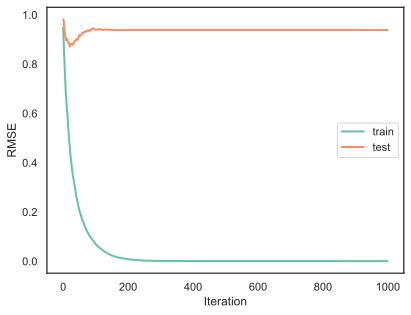

In [16]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

X = data_with_total_score[['Sex','Age','Experience','GSES', 'FoMOs_information', 'FoMOs_episode']].values
y = data_with_total_score['overinvolvement'].values
# y = data_with_total_score[['overinvolvement_retrieve','overinvolvement_sacrify','overinvolvement_interfer']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

reg_mod = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.08,
    subsample=0.75,
    colsample_bytree=1, 
    max_depth=7,
    gamma=0,
    eval_metric='rmse',
)

# 训练模型并指定评估数据集
eval_set = [(X_train, y_train), (X_test, y_test)]
reg_mod.fit(X_train, y_train, eval_set=eval_set, verbose=False)
# 绘制损失曲线
sns.set_style("white")
palette = sns.color_palette("Set2", n_colors=2) 

plt.plot(reg_mod.evals_result()['validation_0']['rmse'], label='train', color=palette[0], linewidth=2)
plt.plot(reg_mod.evals_result()['validation_1']['rmse'], label='test', color=palette[1], linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('Loss.png')
plt.show()


Mean cross-validation RMSE: 0.96
RMSE: 0.938680
R_Squared Score : 0.109068


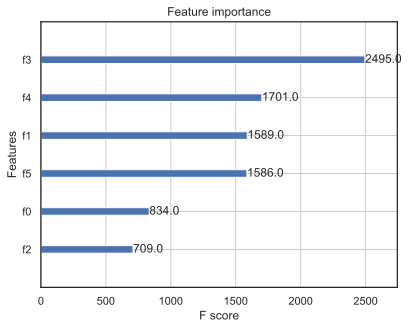

In [17]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# 假设 X_train, y_train, X_test, y_test 已经定义

# # 数据标准化
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 将数据转换为 DMatrix 格式
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

# 定义参数
params = {
    'objective': 'reg:squarederror',  # 回归任务
    'max_depth': 7,
    'learning_rate': 0.08,
    'subsample': 0.75,
    'colsample_bytree': 1,
    'gamma': 0,
    'eval_metric': 'rmse'
}

# 使用 xgb.cv 进行交叉验证
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=1000,  # 最大迭代次数
    nfold=10,  # 10 折交叉验证
    metrics='rmse',  # 评估指标
    early_stopping_rounds=10,  # 早停
    as_pandas=True,  # 返回 pandas DataFrame
    seed=123
)

# 打印交叉验证结果
print("Mean cross-validation RMSE: %.2f" % cv_results['test-rmse-mean'].min())

# 训练模型
reg_mod = xgb.train(params, dtrain, num_boost_round=1000)

# 预测
predictions = reg_mod.predict(dtest)

# 计算 RMSE 和 R^2
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: %f" % rmse)

r2 = r2_score(y_test, predictions)
print("R_Squared Score : %f" % r2)

# 可视化特征重要性
xgb.plot_importance(reg_mod)
plt.show()

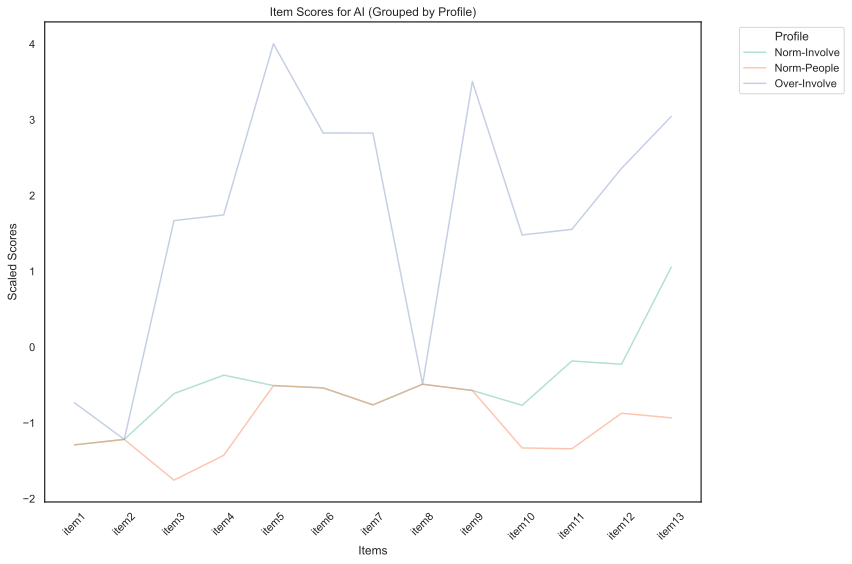

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')


overinvolvement_retrieve = ["分手后，我尝试通过各种方式与他/她保持日常的联系，即使他/她已经明确表示希望保持距离。",
		"分手后，我会经常在社交媒体通过各种方式表达对他/她的依恋。",
		"分手后，我依然会找各种机会与他/她进行沟通和交流情感问题。",
		"分手后，我会尝试购买他/她喜欢但超出我经济能力的礼物来挽回这段感情。",
		"分手后，我会为了试图挽回他/她，通过共同的朋友或社交圈对他/她施加影响。"]
overinvolvement_sacrify = ["我会为了购买他/她喜欢的东西，不惜花费超出我经济承受范围的钱。",
		"我为了和他/她约会，不惜花费超出我经济承受范围的钱。",
		"我会为了陪伴他/她，而经常推掉推迟或取消自己的其他计划。",
		"我会为了有时间陪伴他/她，而压缩自己十分重视的爱好和兴趣的时间。"]
overinvolvement_interfer = ["我会在他/她的工作学习中提出自己的解决方案，即使他/她表示不需要建议。",
		"我会在他/她遇到小问题时立刻介入，即使这些问题他/她可以轻松解决。",
		"我会在他/她处理与朋友或家人的关系时插手，试图用自己的方式解决问题。",
		"我会在他/她进行个人财务管理时提供帮助，即使他/她表示不需要帮助。"]


raw_data = pd.read_csv('raw_data.csv')
alldata = raw_data[overinvolvement_sacrify+overinvolvement_retrieve+overinvolvement_interfer]
ai_raw_data = pd.read_excel('ai_raw_data.xlsx')
ai_all_data = ai_raw_data[overinvolvement_sacrify+overinvolvement_retrieve+overinvolvement_interfer]
# 用标准化alldata的均值和方差标准化ai_all_data
scaler = StandardScaler()
scaler.fit(alldata)
ai_all_data_scaled = scaler.transform(ai_all_data)
ai_all_data_scaled = pd.DataFrame(ai_all_data_scaled, columns=['item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8', 'item9', 'item10', 'item11', 'item12', 'item13'])

profile = ai_raw_data['Profile']
ai_all_data_scaled['Profile'] = profile
# 按照之前绘制item_scores_for_ai的方法绘制ai_all_data_scaled的折线图
# 设置图形大小
plt.figure(figsize=(12, 8))

# 设置主题
sns.set_theme(style='white')

# 将数据从宽格式转换为长格式
melted_data = ai_all_data_scaled.melt(
	id_vars=['Profile'],  # 保留File 列
	value_vars=['item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8', 'item9', 'item10', 'item11', 'item12', 'item13']

)
# 使用 seaborn 绘制折线图
sns.lineplot(
	data=melted_data,
	x='variable', 
	y='value', 
	hue='Profile',  # 按 Profile 分组，设置颜色
	alpha=0.5,      # 设置半透明
	palette='Set2',  # 设置颜色主题
	markers=True,     # 添加标记点
	dashes=False      # 不使用虚线
)

# 添加标题和标签
plt.title('Item Scores for AI (Grouped by Profile)')
plt.xlabel('Items')
plt.ylabel('Scaled Scores')
plt.xticks(rotation=45)  # 旋转 x 轴标签以便更好地显示

# 显示图例
plt.legend(title='Profile', bbox_to_anchor=(1.05, 1), loc='upper left')

# 显示图形
plt.tight_layout()
plt.show()


In [8]:
melted_data

,Profile,variable,value
0,Norm-Involve,item1,-1.289141
1,Norm-People,item1,-1.289141
2,Over-Involve,item1,-0.734672
3,Norm-Involve,item2,-1.217938
4,Norm-People,item2,-1.217938
5,Over-Involve,item2,-1.217938
6,Norm-Involve,item3,-0.613597
7,Norm-People,item3,-1.755174
8,Over-Involve,item3,1.669556
9,Norm-Involve,item4,-0.370134
